In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SiPANN import scee

/home/contagon/anaconda3/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator PolynomialFeatures from version 0.20.3 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/contagon/anaconda3/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.3 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/contagon/anaconda3/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.3 when using version 0.20.4. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [2]:
def pltAttr(x, y, title=None, legend='upper right', save=None):
    if legend is not None:
        plt.legend(loc=legend)
    plt.xlabel(x)
    plt.ylabel(y)
    if title is not None:
        plt.title(title)
    if save is not None:
        plt.savefig(save)

The directional coupler portion of SiPANN is now all organized into classes in the `dc` module. Each class (which represents a different type of directional coupler) has the same functions, but with occasional different parameters. EVERYTHING IS IN NANOMETERS. Can take in np.ndarrays for any arguments, but fails to return sparams if any geometry parameters are. 

To initialize, each class has initial arguments `width, thickness, sw_angle=90`, with sw_angle actually coming last. On top of these, the following have the following arguments:

HalfRing:                  radius, gap<br>
Racetrack Resonator: radius, gap, length<br>
Straight:            gap, length<br>
GapFuncSymmetric:    gap (as a function), dgap, zmin, zmax<br>

Each class has functions:

`update(**kwargs)` changes whatever argument is put in <br>
`sparams(wavelength)` which returns the the sparams of the device. <br>
`predict((in_port, out_port), wavelength)` gives you the coefficient corresponding to the tuple (in_port, out_port) <br>
`gds(units='microns', view=False)` save/view gds file. WIP.

Ports are labeled as:
                2---\      /---4
                     ------
                     ------
                1---/      \---3  
with the ring portion of all couplers being the upper waveguide

### Ring Resonator

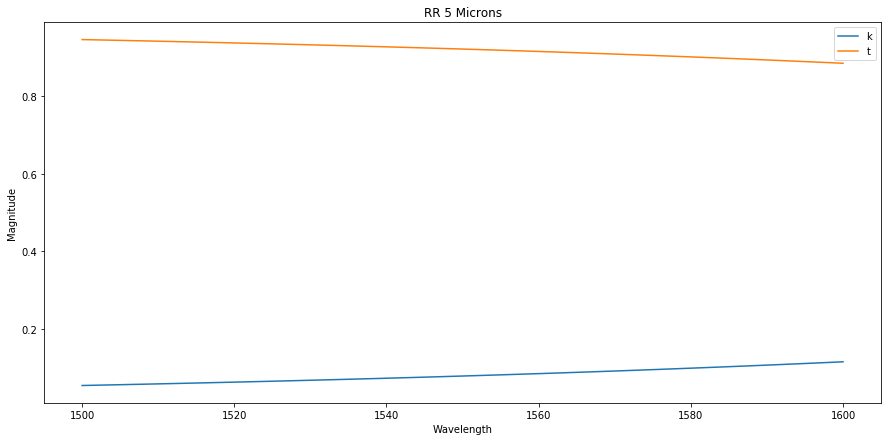

In [10]:
r = 10000
w = 500
t = 220
wavelength = np.linspace(1500, 1600)
gap = 100

rr = scee.HalfRing(w, t, r, gap)
k = rr.predict((1,4), wavelength)
t = rr.predict((1,3), wavelength)
rr.gds(view=True,extra=0,units='microns')

plt.figure(figsize=(15,7))
#plt.subplot(121)
plt.plot(wavelength, np.abs(k)**2, label='k')
plt.plot(wavelength, np.abs(t)**2, label='t')
pltAttr('Wavelength', 'Magnitude', 'RR 5 Microns')
# plt.subplot(122)
# plt.plot(wavelength, np.unwrap(np.angle(k)), label='k')
# plt.plot(wavelength, np.unwrap(np.angle(t)), label='t')
# pltAttr('Gap', 'Phase', 'RR 5 Microns')

In [ ]:
#change it to 50 microns
radius = 50000
rr.update(radius=radius)
k = rr.predict((1,4), wavelength)
t = rr.predict((1,3), wavelength)

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(gap, np.abs(k)**2, label='k')
plt.plot(gap, np.abs(t)**2, label='t')
pltAttr('Gap', 'Magnitude', 'RR 50 Microns')
plt.subplot(122)
plt.plot(gap, np.unwrap(np.angle(k)), label='k')
plt.plot(gap, np.unwrap(np.angle(t)), label='t')
pltAttr('Gap', 'Phase', 'RR 50 Microns')